In [14]:
import numpy as np

from IPython.display import HTML
import matplotlib.pyplot as plt
import matplotlib.collections as mc
from matplotlib.animation import FuncAnimation
from matplotlib.animation import ArtistAnimation
from matplotlib.patches import Rectangle
from mpl_toolkits.mplot3d import Axes3D
from pathlib import Path
import pandas as pd
import pickle
import seaborn as sns
import numpy as np


### Just Messing Around With Tanh

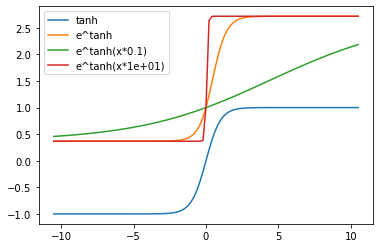

In [15]:
# x = linspace(-11, 11, 101)
# plt.plot(x, np.tanh(x))
# plt.show()
x = np.linspace(-10.5, 10.5, 101)
th = np.tanh(x)
e_th = np.exp(np.tanh(x))
plt.plot(x, th, label='tanh')
plt.plot(x, e_th, label='e^tanh')
c = 0.1  # wind has little effect on fire spreading
plt.plot(x, np.exp(np.tanh(c * x)), label=f'e^tanh(x*{c:.1})')
c = 10.  # the slighted breeze has the maximal effect on fire spreading
plt.plot(x, np.exp(np.tanh(c * x)), label=f'e^tanh(x*{c:.1})')
plt.legend()
plt.show()

# So... wind away from center ranges from -0 to -11. It scales to 0 to -1
# wind toward center ranges from 0 to 11. It scales from 0 to 1.
# e^tanh(x) -> scales from 1/e to e and is centered on 1.
# So a neighbor with no wind or away from center would be x = 0, tanh(x) = 0, e^tanh(x) = 1,
# Therefore its weighted fire = 1 * 1 = 1.
# A neighbor with light wind away would be ~1.
# A neighbor with wind away stronger than would be ~1/e
# A neighber with strong wind toward center would be ~e.
# This range is similar to the delta_z weight range, since it is e^-x, where x in [-1, 1]

## What is The Error Function?

https://en.wikipedia.org/wiki/Error_function

erf(x) is the probability that a normal random variable with 0 mean and 1/2 standard deviation is in $[-x, x]$

Text(0.5, 1.0, 'The error function')

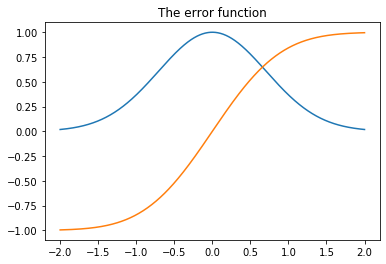

In [16]:
import scipy.special

x = np.linspace(-2, 2, 1001)
y = np.exp(-x**2)
er = scipy.special.erf(x)
plt.plot(x, y, label='e^(-x^2)')
plt.plot(x, er, label='erf(x)')
plt.title('The error function')

## Cloud Pricing

## Constant Model Grid Search

- 5-fold cross-validation. dataset size = 40. training size = 20. 5-fold sizes = {train: 16, test: 4}
- scores are mean validation fitness across all 5 folds.

In [17]:
# Load the results of the GridSearchCV
with open('real_results/grid_search_exp_dataset1/results_model_constant_rep_0', 'rb') as fh:
    rc = pickle.load(fh)

FileNotFoundError: [Errno 2] No such file or directory: 'real_results/grid_search_exp_dataset1/results_model_constant_rep_0'

- What are the best parameters?
- What is the distribution of scores?

In [18]:
rc['best_params']

NameError: name 'rc' is not defined

In [19]:
mutpbs = gs_model.cv_results_['param_mutpb'].data
cxpbs = gs_model.cv_results_['param_cxpb'].data
scores = gs_model.cv_results_['mean_test_score']
stds = gs_model.cv_results_['std_test_score']
mutpbs, cxpbs, scores, stds

NameError: name 'gs_model' is not defined

### Plot fitness of each hyperparameter

In [20]:
def plot_hyperparams(mutpbs, cxpbs, scores):
    plt.plot(mutpbs, scores, '.')
    plt.title('mutation rate vs fitness')
    plt.xlabel('mutation rate')
    plt.ylabel('score')
    plt.show()

    plt.plot(cxpbs, scores, '.')
    plt.title('crossover rate vs fitness')
    plt.xlabel('crossover rate')
    plt.ylabel('score')
    plt.show()

    best_i = np.argmax(scores)
    print(f'best cxpb: {cxpbs[best_i]}, best mutpb: {mutpbs[best_i]}, best score: {scores[best_i]}')


    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    ax.plot_surface(mutpbs.reshape(11, 11), cxpbs.reshape(11, 11), scores.reshape(11, 11), cmap='Greens')
    ax.set_xlabel('mutpb')
    ax.set_ylabel('cxpb')
    ax.set_zlabel('fitness')
    plt.show()

    cdf = pd.DataFrame({'mutpb': mutpbs, 'cxpb': cxpbs, 'fitness': scores, 'std': stds})
    mutmeans = cdf.groupby('mutpb').mean()
    cxmeans = cdf.groupby('cxpb').mean()
    plt.plot(mutmeans.index, mutmeans['fitness'], '.')
    plt.title('mutation rate vs mean fitness across all crossover rates')
    plt.xlabel('mutation rate')
    plt.ylabel('score')
    plt.show()

    plt.plot(cxmeans.index, cxmeans['fitness'], '.')
    plt.title('crossover rate vs mean fitness across all mutation rates')
    plt.xlabel('crossover rate')
    plt.ylabel('score')
    plt.show()
    


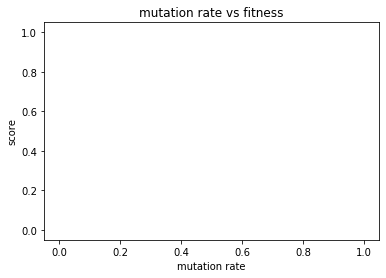

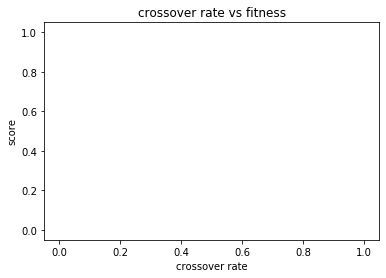

ValueError: attempt to get argmax of an empty sequence

In [21]:
plot_hyperparams(mutpbs, cxpbs, scores)

# described by JJ as a line of splattering drops. This is the raindrop distribution.

## Logistic Model Grid Search



In [22]:
mutpbs = []
cxpbs = []
scores = []
files = []
for p in Path('real_results/dataset1_gse2').glob('*_rep_0_*'):
#     print(p)
    with open(p, 'rb') as fh:
        rl = pickle.load(fh)
        mutpbs.append(rl['mutpb'])
        cxpbs.append(rl['cxpb'])
        scores.append(rl['test_fitness'])
        files.append(str(p.name))
      
mutpbs = np.array(mutpbs)
cxpbs = np.array(cxpbs)
scores = np.array(scores)
files = np.array(files)
mutpbs, cxpbs, scores, files

# the results come in from the filesystem in a disorganized fashion.
# arrange the results s.t. they are sorted by key=(cxpb, mutpb)
# This makes the 3d plot happy.
idx = np.argsort(mutpbs, kind='stable')
mutpbs = mutpbs[idx]
cxpbs = cxpbs[idx]
scores = scores[idx]
files = files[idx]
mutpbs, cxpbs, scores, files
idx = np.argsort(cxpbs, kind='stable')
mutpbs = mutpbs[idx]
cxpbs = cxpbs[idx]
scores = scores[idx]
files = files[idx]
mutpbs, cxpbs, scores, files


(array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64))

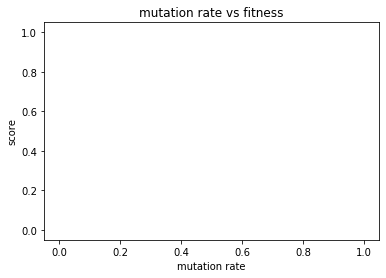

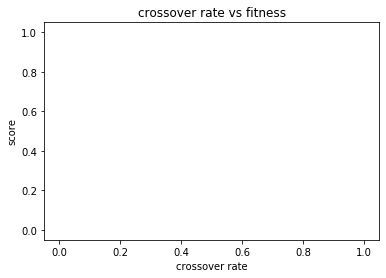

ValueError: attempt to get argmax of an empty sequence

In [23]:
plot_hyperparams(mutpbs, cxpbs, scores)

## Figure: Fitness vs Generation

In [56]:
# load results
def load_exp_results(dn='real_results/dataset1', model_type='constant'):
    rs = []
    for p in Path(dn).glob(f'results_model_{model_type}_rep_*'):
        with open(p, 'rb') as fh:
            rs.append(pickle.load(fh))
            
    return list(sorted(rs, key=lambda r: r['i_rep']))


In [61]:
lrs = load_exp_results(dn='dataset', model_type='logistic')
crs = load_exp_results(dn='dataset', model_type='constant')
blrs = load_exp_results(dn='dataset', model_type='balanced_logits')
gprs = load_exp_results(dn='dataset', model_type='gp')

In [58]:

def rs_to_gen_max_fits(rs):
    """
    :return: ndarray, shape=(n_rep, n_gen), of the max fitness of the population each generation.
    """
    n_rep = len(rs)
    n_gen = max(len(r['log'].chapters['fitness']) for r in rs)
    max_fits = np.full((n_rep, n_gen), np.nan)
    for i_rep in range(n_rep):
        for i_gen in range(n_gen):
            max_fits[i_rep, i_gen] = rs[i_rep]['log'].chapters['fitness'][i_gen]['max']

    return max_fits


def rs_to_gen_avg_sizes(rs):
    """
    :return: ndarray, shape=(n_rep, n_gen), of the average size of the population each generation.
    """
    n_rep = len(rs)
    n_gen = max(len(r['log'].chapters['fitness']) for r in rs)
    avg_sizes = np.full((n_rep, n_gen), np.nan)
    for i_rep in range(n_rep):
        for i_gen in range(n_gen):
            avg_sizes[i_rep, i_gen] = rs[i_rep]['log'].chapters['size'][i_gen]['avg']

    return avg_sizes

def rs_to_fitnesses(rs):
    """
    :return: ndarray, shape=(n_rep, n_eval), of the fitness of each fitness evaluation from each repetition.
    """
    n_rep = len(rs)
    n_eval = max(len(r['fitnesses']) for r in rs)  # note: different reps will have different # of evals
    vals = np.full((n_rep, n_eval), np.nan)  # shape: (n_rep, n_eval)
    for i_rep in range(n_rep):
        fitnesses = rs[i_rep]['fitnesses']
        vals[i_rep, :len(fitnesses)] = fitnesses
        
    return vals
    

def rs_to_fitness(rs, kind='train'):
    """
    :param dataset_type: 'train', 'test', 'future_train' or 'future_test'
    :return: ndarray, shape=(n_rep,), of the 'train_fitness' of each result.
    """
    key = kind + '_fitness'
    return nd.array([r[key] for r in rs])


def plot_figure_fit_vs_gen(model_rss, model_types):  
    font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 16}
    plt.rc('font', **font)
    
    fig, ax = plt.subplots(figsize=(10,6))
    
    for rs, model_type in zip(model_rss, model_types):
        # plot mean and std max fitness per generation
        n_gen = max(len(r['log'].chapters['fitness']) for r in rs)
        max_fits = rs_to_gen_max_fits(rs)
        mean_max_fits = max_fits.mean(axis=0)
        std_max_fits = max_fits.std(axis=0)
        plt.errorbar(np.arange(n_gen), mean_max_fits, std_max_fits, label=model_type)
        
    plt.title(f'Fitness vs Generation')
    plt.xlabel('generation')
    plt.ylabel('mean and sd of IoU across 20 reps')
    plt.legend()
    plt.show()

    
def analyze_exp_results(rs, model_type='logistic'):
    """
    :param rs: list of result dicts, one result per repetition
    """
    n_rep = len(rs)
    n_gen = max(len(r['log'].chapters['fitness']) for r in rs)
    model_type = rs[0]['model_type']
    
    # collect statistics
    max_fits = np.full((n_rep, n_gen), np.nan)
    avg_sizes = np.full((n_rep, n_gen), np.nan)
    for i_rep in range(n_rep):
        for i_gen in range(n_gen):
            max_fits[i_rep, i_gen] = rs[i_rep]['log'].chapters['fitness'][i_gen]['max']
            avg_sizes[i_rep, i_gen] = rs[i_rep]['log'].chapters['size'][i_gen]['avg']

    # plot mean and std max fitness per generation
    mean_max_fits = max_fits.mean(axis=0)
    std_max_fits = max_fits.std(axis=0)
    plt.errorbar(np.arange(n_gen), mean_max_fits, std_max_fits)
    plt.title(f'{model_type.capitalize()} Model Fitness vs Generation')
    plt.xlabel('generation')
    plt.ylabel('mean and sd of IoU across 20 reps')
    plt.show()
    
    
def plot_figure_fit_vs_eval(model_rss, model_types):    
    font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 16}
    plt.rc('font', **font)
    
    fig, ax = plt.subplots(figsize=(10,6))
    for rs, model_type in zip(model_rss, model_types):
        n_rep = len(rs)
#         print('n_rep', n_rep)
        # plot mean and std max fitness per generation
        fitnesses = rs_to_fitnesses(rs)
#         print('fitnesses.shape', fitnesses.shape)
        n_eval = fitnesses.shape[1]
#         print('n_eval', n_eval)
        mean_fits = np.nanmean(fitnesses, axis=0)
        std_fits = np.nanstd(fitnesses, axis=0)
#         print('mean_fits.shape', mean_fits.shape)
#         print('std_fits.shape', std_fits.shape)
#         print('mean_fits[:10]', mean_fits[:10])
#         print('std_fits[:10]', std_fits[:10])
#         print('mean_fits[100:110]', mean_fits[100:110])
#         print('std_fits[100:110]', std_fits[100:110])
        evals = np.arange(n_eval)
#         print('n_eval', n_eval)
        plt.plot(evals, mean_fits, '.', label=model_type, alpha=0.25)
#         plt.errorbar(evals, mean_fits, std_fits, marker='.', linestyle='', label=model_type, alpha=0.1)
#         evals = np.tile(evals, (n_rep, 1))
#         plt.plot(evals, fitnesses, '.', label=model_type, alpha=0.2)
        
    plt.title(f'Fitness vs Evaluations')
    plt.xlabel('evaluation count')
    plt.ylabel(f'mean fitness across {n_rep} reps')
    plt.legend()
    plt.show()

    

ValueError: max() arg is an empty sequence

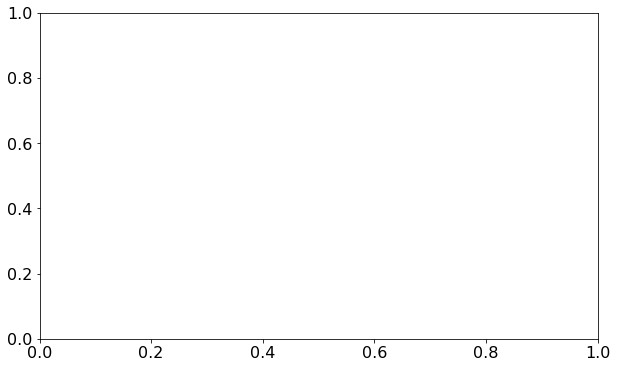

In [59]:
plot_figure_fit_vs_gen([crs, lrs, gprs], ('constant', 'logistic', 'gp'))
plot_figure_fit_vs_eval([crs, lrs, gprs], ('constant', 'logistic', 'gp'))

## Figure: Fitness Boxplot

In [60]:
def plot_figure_fitness_boxplot(crs, lrs, blrs, gprs):
    n_rep = len(crs)
    print(len(crs), len(lrs), len(blrs))
    if not (n_rep == len(crs) and n_rep == len(lrs) and n_rep == len(blrs) and n_rep == len(gprs)):
        raise Exception('all results lists should have the same length. ' +
                        f'len(crs), len(lrs), len(blrs) len(gprs) = {len(crs), len(lrs), len(blrs), len(gprs)}')
    
    def extract(rs):
        fit_train = np.array([rs[i]['train_fitness'] for i in range(n_rep)])
        fit_test = np.array([rs[i]['test_fitness'] for i in range(n_rep)])
        return fit_train, fit_test
    
    c_fit_train, c_fit_test,  = extract(crs)
    l_fit_train, l_fit_test,= extract(lrs)
    bl_fit_train, bl_fit_test,  = extract(blrs)
    gp_fit_train, gp_fit_test, = extract(gprs)

    # get data in tidy form prefered by seaborn
    n_model = 4
    no_future = True
    if no_future:
        n_dataset = 2
        fitnesses = np.hstack([
            c_fit_train, c_fit_test, 
            gp_fit_train, gp_fit_test,
            l_fit_train, l_fit_test, 
            bl_fit_train, bl_fit_test,
        ])
        datasets = np.tile(np.repeat(['train', 'test', ], n_rep), n_model)
    else:
        n_dataset = 4
        fitnesses = np.hstack([
            c_fit_train, c_fit_test, c_fit_future_train, c_fit_future_test,
            gp_fit_train, gp_fit_test, gp_fit_future_train, gp_fit_future_test,
            l_fit_train, l_fit_test, l_fit_future_train, l_fit_future_test,
            bl_fit_train, bl_fit_test, bl_fit_future_train, bl_fit_future_test,
        ])
        datasets = np.tile(np.repeat(['train', 'test', 'future_train', 'future_test'], n_rep), n_model)
        
    models = np.repeat(['constant', 'gp', 'logistic', 'true'], n_rep * n_dataset)
    reps = np.tile(np.arange(n_rep), n_dataset * n_model)
    df = pd.DataFrame({'model': models, 'dataset': datasets, 
                       'fitness': fitnesses, 'rep': reps})
    
    font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 16}
    plt.rc('font', **font)

    fig, ax = plt.subplots(figsize=(10,6))
    ax = sns.boxplot(x="dataset", y="fitness", hue="model",
                     data=df, palette="Set3", ax=ax)
    plt.title('Train and Test Fitness of Models')
#     fig, ax = plt.subplots(2, 2, figsize=(8,6))
#     ax[0,0].boxplot([c_fit_train, l_fit_train, bl_fit_train])
#     ax[0,1].boxplot([c_fit_test, l_fit_test, bl_fit_test])
#     ax[1,0].boxplot([c_fit_future_train, l_fit_future_train, bl_fit_future_train])
#     ax[1,1].boxplot([c_fit_future_test, l_fit_future_test, bl_fit_future_test])
#     plt.show()
    
    
    

20 20 20


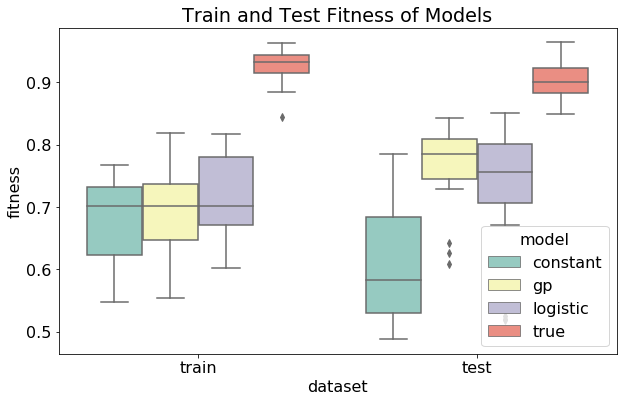

In [55]:
plot_figure_fitness_boxplot(crs, lrs, blrs, gprs)